## Variance Analysis

This notebook will explore the variances of the entity vector to each of the constituent papers.

We can start with loading our vectors.

In [1]:
import csv
import json
import operator

In [2]:
import numpy as np

In [3]:
def read_vectors(file_name):
    line = open(file_name, "r")
    for l in line:
        d = eval(l)
    final_dict = {k:eval(v) for k, v in d.items()}
    return final_dict

In [4]:
research_cities_variances = read_vectors("../saved_data_structures/research_teaching_variances/research_variances_cities.txt")

In [5]:
research_orgs_variances = read_vectors("../saved_data_structures/research_teaching_variances/research_variances_orgs.txt")

In [6]:
teaching_cities_variances = read_vectors("../saved_data_structures/research_teaching_variances/teaching_variances_cities.txt")

In [7]:
teaching_orgs_variances = read_vectors("../saved_data_structures/research_teaching_variances/teaching_variances_orgs.txt")

In [8]:
job_cities_variances = read_vectors("../saved_data_structures/job_variance_vectors/jobs_variances_cities.txt")

In [9]:
job_orgs_variances = read_vectors("../saved_data_structures/job_variance_vectors/jobs_variances_orgs.txt")

In [10]:
for city in job_cities_variances:
    if len(job_cities_variances[city]) > 100000:
        print(city, len(job_cities_variances[city]))
    #if len(job_cities_variances[city]) < 1000:
     #   print(city, len(job_cities_variances[city]))

New Orleans 106424
Cleveland 190601
Tampa 251689
San Francisco 522261
Minneapolis 297516
Oakland 122881
Orlando 213710
Denver 355829
Aurora 155301
Irving 110427
Los Angeles 649265
Irvine 151276
Pittsburgh 194552
San Diego 397264
Albuquerque 125783
Phoenix 368705
Dallas 419800
Boston 360732
Washington 381963
Arlington 184743
Fort Worth 196938
Las Vegas 276983
Springfield 117555
New York 1107709
Chicago 575401
Salt Lake City 110657
Raleigh 179856
Houston 544243
Columbus 304793
Omaha 153901
Portland 290984
Seattle 375053
Charlotte 333948
Atlanta 424197
Saint Paul 113805


In [11]:
for org in job_orgs_variances:
    if len(job_orgs_variances[org]) > 10000:
        print(org, len(job_orgs_variances[org]))
    #if len(job_cities_variances[city]) < 1000:
     #   print(city, len(job_cities_variances[city]))

Intuit 11449
Macy's 84749
Marriott International Incorporated 160368
Nestle USA Incorporated 11409
United Parcel Service Incorporated 56233
Best Buy 68293
Caesar's Entertainment 11184
Burlington Stores 13066
Army National Guard 43408
Sprouts Farmers Markets 25097
PricewaterhouseCoopers 17462
Hyatt 30649
Homeadvisor 13589
US Navy 28271
Allstate 13509
Sentext Solutions 14698
Aramark 75026
Bayada Home Health Care 11564
Atria Senior Living 12802
Allied Universal Corporation 52655
Fidelity Brokerage Services 10420
Cleveland Clinic 17491
Starbucks Coffee Company 35284
Advantage Sales & Marketing 36406
Microsoft Corporation 21376
Ernst & Young 12284
Disney 15918
Ulta Beauty Inc. 31012
Siemens 13953
Hilton Hotel Corporation 60722
Taco Bell 18453
Humana 30696
The PNC Financial Services Group, Inc. 19991
Target 92847
KFC 16450
Bank of America 66266
US Army 65521
Chili's 10097
cbre 24284
VF Corporation 11842
Sherwin Williams 26950
Medtronic 11164
Sears 50800
Whole Foods Market, Inc. 47021
Koch In

In [12]:
for org in job_orgs_variances:
    if 'Alphabet' in org:
        print(org)

In [13]:
def create_variance_sizes(variances, paper_cutoff=100):
    variance_size_ratios = {}
    entity_no_of_papers = {}
    for entity in variances:
        if len(variances[entity]) > paper_cutoff:
            variance_size = round(np.mean(variances[entity], 0) / len(variances[entity]), 3)
            variance_size_ratios[entity] = variance_size
            entity_no_of_papers[entity] = len(variances[entity])
    return variance_size_ratios, entity_no_of_papers

In [14]:
list(research_cities_variances.keys())[0:10]

['Berkeley',
 'Baltimore',
 'Washington',
 'New Brunswick',
 'University Pk',
 'Argonne',
 'Cincinnati',
 'Chicago',
 'Seattle',
 'Houston']

In [15]:
research_cities_variances['Berkeley']

[59.130873163040086,
 72.53919021815243,
 51.809294064783394,
 61.18703780820626,
 59.87304148017248,
 60.849065646442355,
 61.48718328061914,
 75.49231614391753,
 66.64013337337454,
 70.82032949147712,
 56.86066351311535,
 53.32897160487138,
 58.185077788029396,
 54.07091205574096,
 60.62168711343824,
 64.38430328402818,
 63.136323047382874,
 62.62455710202029,
 71.55123597189896,
 57.790632984590495,
 76.30914012957957,
 66.38667220793187,
 54.7313127553358,
 71.5479068233667,
 65.62291496171429,
 66.48533124313616,
 64.52608345285105,
 69.78400926812408,
 70.72570985081984,
 65.49264903086936,
 67.77110677452002,
 62.18188853751016,
 55.49234774949461,
 75.74289150246214,
 58.844402150012705,
 68.10260440728112,
 58.86420119768385,
 61.24511995777674,
 45.28705275298678,
 79.96639324057567,
 57.230430211500384,
 67.62454067800216,
 62.96910177696064,
 67.00466344935508,
 68.19580260184358,
 54.30015299172193,
 63.10568030521151,
 54.27621558332789,
 74.51627147418257,
 67.1208789788

In [16]:
def variance_stats(variances, min_papers=100):
    variance_stats = {}
    for entity in variances:
        if len(variances[entity]) > min_papers:
            mean_var = round(np.mean(variances[entity]), 3)
            var_var = round(np.var(variances[entity]), 3)
            variance_stats[entity] = (mean_var, var_var)
    return variance_stats
        

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
def plot_variance(variances, entity_name):
    angles = variances[entity_name]
    ax = sns.distplot(angles)
    ax.set(xlabel="Angles of difference", ylabel="Proportion of Counts", title="Distribution of variance angles for " + entity_name)
    plt.show()

In [19]:
research_orgs_info = variance_stats(research_orgs_variances)

In [20]:
research_orgs_info['MIT']

(64.429, 63.414)

In [21]:
teaching_orgs_info = variance_stats(teaching_orgs_variances)

In [22]:
jobs_cities_info = variance_stats(job_cities_variances)

In [96]:
research_cities_info = variance_stats(research_cities_variances)

In [97]:
teaching_cities_info = variance_stats(teaching_cities_variances)

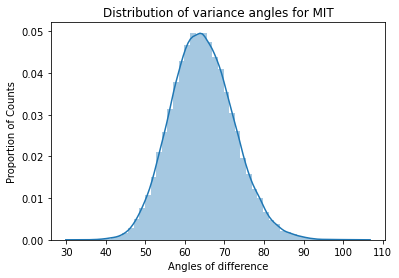

In [23]:
plot_variance(research_orgs_variances, 'MIT')

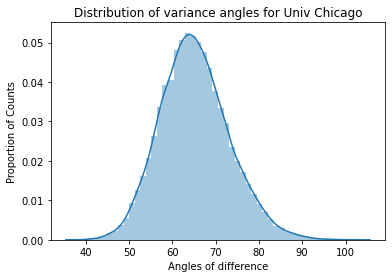

In [24]:
plot_variance(research_orgs_variances, 'Univ Chicago')

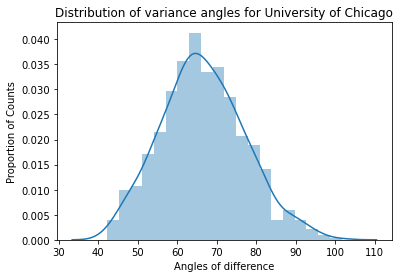

In [25]:
plot_variance(teaching_orgs_variances, 'University of Chicago')

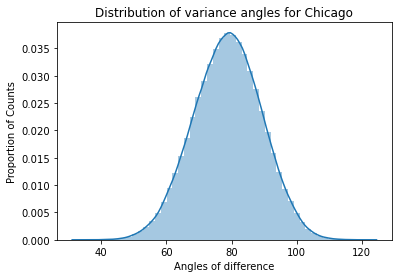

In [26]:
plot_variance(job_cities_variances, 'Chicago')

In [91]:
teaching_orgs_info['San Jacinto Community College']

(23.507, 506.507)

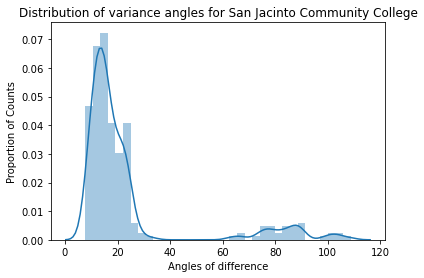

In [92]:
plot_variance(teaching_orgs_variances, 'San Jacinto Community College')

In [27]:
research_orgs_info['MIT']

(64.429, 63.414)

In [28]:
research_orgs_info['Univ Chicago']

(65.178, 63.242)

In [29]:
def sort_vals(vector, reverse=False):
    means = {}
    variances = {}
    for entity in vector:
        means[entity] = vector[entity][0]
        variances[entity] = vector[entity][1]
    
    sorted_means = sorted(means.items(), key=operator.itemgetter(1))
    sorted_variances = sorted(variances.items(), key=operator.itemgetter(1))

    if not reverse:
        return sorted_means, sorted_variances
    else:
        sorted_means.reverse()
        sorted_variances.reverse()
        return sorted_means, sorted_variances


In [30]:
research_orgs_sorted_means, research_orgs_sorted_vars = sort_vals(research_orgs_info, reverse=True)


In [31]:
teaching_orgs_sorted_means, teaching_orgs_sorted_vars = sort_vals(teaching_orgs_info, reverse=True)


In [32]:
jobs_cities_sorted_means, jobs_cities_sorted_vars = sort_vals(jobs_cities_info, reverse=True)


In [33]:
jobs_cities_sorted_means[-30:]

[('Chula Vista', 75.408),
 ('Aurora', 75.372),
 ('San Francisco', 75.338),
 ('Kaneohe', 75.148),
 ('Yarmouth', 74.98),
 ('Minneapolis', 74.952),
 ('West Linn', 74.924),
 ('Oakland', 74.924),
 ('Eagle Point', 74.881),
 ('Madras', 74.695),
 ('North Clarendon', 74.643),
 ('Bellows Falls', 74.629),
 ('Waipahu', 74.557),
 ('Tampa', 74.539),
 ('Mckinney', 74.452),
 ('South Hadley', 74.272),
 ('Schofield Barracks', 74.263),
 ('Pepperell', 74.152),
 ('Denver', 74.012),
 ('New Orleans', 73.839),
 ('Orlando', 73.686),
 ('Fort Shafter', 73.497),
 ('Cleveland', 73.441),
 ('Buckeye', 72.983),
 ('Honolulu', 72.416),
 ('Wichita', 71.953),
 ('Cortez', 71.885),
 ('Southbridge', 70.725),
 ('Royal City', 68.762),
 ('Tripler Army Medical Center', 64.331)]

In [34]:
research_orgs_sorted_means[0:30]

[('Des Moines Univ', 67.416),
 ('High Point Univ', 67.189),
 ('Vanderbilt Ingram Canc Ctr', 66.46),
 ('Malcom Randall VA Med Ctr', 66.39),
 ('Bentley Coll', 66.377),
 ('Janssen Res & Dev LLC', 66.293),
 ('Steadman Philippon Res Inst', 66.279),
 ('Sci Applicat Int Corp', 66.208),
 ('Weis Ctr Res', 66.151),
 ('Univ Dist Columbia', 66.097),
 ('Rehabil Inst Chicago', 66.095),
 ('Kaiser Permanente Med Care Program', 66.084),
 ('Virginia State Univ', 66.079),
 ('Appalachian State Univ', 66.078),
 ('Arcadia Univ', 65.998),
 ('Univ Evansville', 65.985),
 ('Univ Baltimore', 65.941),
 ('Liberty Mutual Res Inst Safety', 65.903),
 ('SUNY Coll Plattsburgh', 65.866),
 ('Univ Maryland Eastern Shore', 65.844),
 ('St Cloud State Univ', 65.795),
 ('VAMC', 65.786),
 ('VA Long Beach Healthcare Syst', 65.772),
 ('Univ Texas Richardson', 65.753),
 ('Roswell Pk Canc Inst', 65.742),
 ('Westminster Coll', 65.713),
 ('Med Univ Ohio', 65.71),
 ('Norris Cotton Canc Ctr', 65.705),
 ('Angelo State Univ', 65.698),
 

In [35]:
research_orgs_sorted_means[-30:]

[('Family Hlth Int', 60.114),
 ('So Res Inst', 60.113),
 ('Inova Hlth Syst', 60.047),
 ('US Hlth Resources & Serv Adm', 60.019),
 ('Pfizer Global R&D', 59.872),
 ('Gilead Sci Inc', 59.774),
 ('SW Oncol Grp', 59.698),
 ('Bernice P Bishop Museum', 59.643),
 ('Salus Univ', 59.64),
 ('Cephalon Inc', 59.629),
 ('Hamner Inst Hlth Sci', 59.591),
 ('Pan Amer Hlth Org', 59.581),
 ('St Davids Med Ctr', 59.526),
 ('Yerkes Natl Primate Res Ctr', 59.464),
 ('Manhattan Eye Ear & Throat Hosp', 59.3),
 ('New Mexico Highlands Univ', 59.129),
 ('Nat Hist Museum Los Angeles Cty', 59.103),
 ('Boehringer Ingelheim Pharmaceut Inc', 58.891),
 ('Natl Radio Astron Observ', 58.821),
 ('EO Lawrence Berkeley Natl Lab', 58.798),
 ('Fenway Hlth', 58.795),
 ('Bristol Myers Squibb Res & Dev', 58.648),
 ('Indian Hlth Serv', 58.426),
 ('Zucker Hillside Hosp', 58.262),
 ('Sloan Kettering Inst Canc Res', 58.044),
 ('AstraZeneca R&D Boston', 56.298),
 ('Minneapolis Heart Inst Fdn', 55.896),
 ('St Xavier Univ', 54.825),
 (

In [36]:
teaching_orgs_sorted_means[0:30]

[('Columbia University in the City of New York', 68.671),
 ('Bennington College', 68.404),
 ('Johns Hopkins University', 67.714),
 ('Cornell University', 67.611),
 ('Yale University', 67.431),
 ('Le Moyne College', 67.35),
 ('Tufts University', 67.261),
 ('University of Illinois at Urbana-Champaign', 66.672),
 ('Vanderbilt University', 66.657),
 ('University of Rochester', 66.632),
 ('Massachusetts Institute of Technology', 66.559),
 ('University of Chicago', 66.556),
 ('College of Marin', 66.468),
 ('Reed College', 66.436),
 ('Wellesley College', 66.324),
 ('Kenyon College', 66.324),
 ('Princeton University', 66.249),
 ('Salisbury University', 66.236),
 ('California Institute of Technology', 66.235),
 ('University of Notre Dame', 66.227),
 ('Fordham University', 66.14),
 ('Villanova University', 66.043),
 ('James Madison University', 66.026),
 ('University of Miami', 65.953),
 ('Brown University', 65.357),
 ('Duke University', 65.348),
 ('Pomona College', 65.327),
 ('Georgetown Univer

In [37]:
teaching_orgs_sorted_means[-30:]

[('Marylhurst University', 39.812),
 ('Bucks County Community College', 39.449),
 ('Oral Roberts University', 39.432),
 ('Hocking College', 39.394),
 ('Adler Graduate School', 38.922),
 ('Texas A & M International University', 38.741),
 ('Allegheny College', 38.589),
 ('Midlands Technical College', 38.387),
 ('Montreat College', 38.369),
 ('Santa Barbara City College', 38.365),
 ('Lansing Community College', 37.997),
 ('Vincennes University', 37.264),
 ('Neosho County Community College', 36.736),
 ('Sierra College', 36.643),
 ('Prairie View A & M University', 36.543),
 ('Lincoln Memorial University', 36.134),
 ('North Idaho College', 35.971),
 ('State College of Florida-Manatee-Sarasota', 35.814),
 ('Amberton University', 35.368),
 ('Coastal Bend College', 34.432),
 ('Calvin College', 33.648),
 ('Laredo Community College', 33.472),
 ('Technical College of the Lowcountry', 32.668),
 ('Clark State Community College', 32.134),
 ('Rowan College at Burlington County', 31.75),
 ('Rio Salado 

In [38]:
def plot_all_variance_info(angle_info, xlabel):
    angles = []
    for info in angle_info:
        entity, angle = info
        angles.append(angle)
    ax = sns.distplot(angles)
    ax.set(xlabel=xlabel, ylabel="Proportion of counts", title="Distribution of variance angles")
    plt.show()

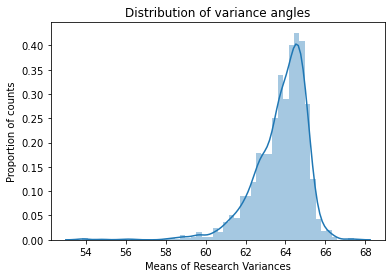

In [39]:
plot_all_variance_info(research_orgs_sorted_means, "Means of Research Variances")

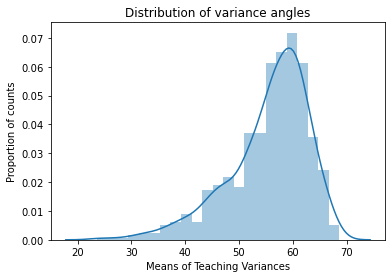

In [40]:
plot_all_variance_info(teaching_orgs_sorted_means, "Means of Teaching Variances")

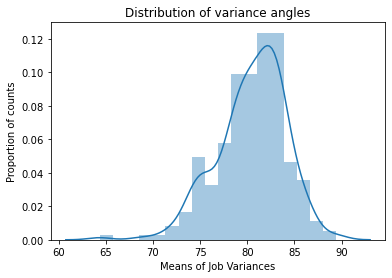

In [41]:
plot_all_variance_info(jobs_cities_sorted_means, "Means of Job Variances")

In [42]:
research_orgs_size_ratio, research_orgs_sizes = create_variance_sizes(research_orgs_variances)

In [43]:
sorted_research_orgs_size_ratios = sorted(research_orgs_size_ratio.items(), key=operator.itemgetter(1))

In [44]:
sorted_research_orgs_sizes = sorted(research_orgs_sizes.items(), key=operator.itemgetter(1))

In [45]:
sorted_research_orgs_size_ratios[0:40]

[('Harvard Univ', 0.0),
 ('Univ Calif Berkeley', 0.001),
 ('Johns Hopkins Univ', 0.001),
 ('Univ Washington', 0.001),
 ('Univ Calif Los Angeles', 0.001),
 ('Ohio State Univ', 0.001),
 ('Univ Wisconsin', 0.001),
 ('Univ Florida', 0.001),
 ('Duke Univ', 0.001),
 ('Univ Minnesota', 0.001),
 ('Univ N Carolina', 0.001),
 ('Univ Michigan', 0.001),
 ('Univ Pittsburgh', 0.001),
 ('Univ Illinois', 0.001),
 ('Stanford Univ', 0.001),
 ('Univ Penn', 0.001),
 ('Columbia Univ', 0.001),
 ('Yale Univ', 0.001),
 ('Univ Calif Davis', 0.001),
 ('Univ Maryland', 0.001),
 ('MIT', 0.001),
 ('Univ Calif San Diego', 0.001),
 ('Penn State Univ', 0.002),
 ('Univ Chicago', 0.002),
 ('Boston Univ', 0.002),
 ('Texas A&M Univ', 0.002),
 ('Cornell Univ', 0.002),
 ('Univ Massachusetts', 0.002),
 ('Purdue Univ', 0.002),
 ('Georgia Inst Technol', 0.002),
 ('Michigan State Univ', 0.002),
 ('Northwestern Univ', 0.002),
 ('Washington Univ', 0.002),
 ('Univ Arizona', 0.002),
 ('Univ Calif Irvine', 0.002),
 ('Univ So Calif'

In [46]:
sorted_research_orgs_sizes[-40:]

[('Univ Massachusetts', 30197),
 ('Univ Texas Austin', 30278),
 ('Boston Univ', 30320),
 ('Emory Univ', 30545),
 ('Univ Chicago', 30615),
 ('Vanderbilt Univ', 30839),
 ('Purdue Univ', 31982),
 ('Univ Arizona', 32880),
 ('Mayo Clin', 32890),
 ('Univ So Calif', 33694),
 ('NYU', 33827),
 ('Washington Univ', 35786),
 ('Texas A&M Univ', 37635),
 ('Cornell Univ', 40126),
 ('Northwestern Univ', 40767),
 ('Univ Colorado', 41721),
 ('Penn State Univ', 42202),
 ('Univ Calif San Francisco', 42695),
 ('MIT', 43929),
 ('Ohio State Univ', 45251),
 ('Univ Calif Davis', 46160),
 ('Yale Univ', 46277),
 ('Duke Univ', 47374),
 ('Univ Pittsburgh', 48161),
 ('Univ N Carolina', 48654),
 ('Univ Florida', 49036),
 ('Columbia Univ', 51007),
 ('Univ Calif San Diego', 51065),
 ('Univ Maryland', 52315),
 ('Johns Hopkins Univ', 52594),
 ('Univ Minnesota', 52623),
 ('Univ Penn', 53217),
 ('Univ Wisconsin', 56142),
 ('Univ Calif Berkeley', 58831),
 ('Stanford Univ', 61928),
 ('Univ Calif Los Angeles', 62999),
 ('Uni

In [47]:
sorted_research_orgs_sizes[0:40]

[('Philadelphia Univ', 101),
 ('Fed Reserve Bank New York', 101),
 ('St Marys Coll', 101),
 ('So Oregon Univ', 101),
 ('Vet Adm Hosp', 101),
 ('Univ Texas Permian Basin', 101),
 ('Johns Hopkins Kimmel Canc Ctr', 101),
 ('Natl Univ', 101),
 ('Nassau Univ', 101),
 ('NYU Hosp Joint Dis', 101),
 ('PATH', 101),
 ('Georgia Gwinnett Coll', 101),
 ('Geisel Sch Med', 101),
 ('West Texas A&M Univ', 101),
 ('Hosp St Raphael', 102),
 ('James Whitcomb Riley Hosp Children', 102),
 ('Marine Resources Res Inst', 102),
 ('Louis Stokes Cleveland VA Med Ctr', 102),
 ('Lankenau Hosp', 102),
 ('St Peters Univ Hosp', 102),
 ('Frostburg State Univ', 102),
 ('Broad Inst Harvard', 102),
 ('Sun Hlth Res Inst', 102),
 ('CUNY Queensborough Community Coll', 102),
 ('Harvard Massachusetts Inst Technol', 102),
 ('Stanford Univ Sch Med', 102),
 ('Cornell Lab Ornithol', 103),
 ('Olmsted Med Ctr', 103),
 ('Lincoln Med & Mental Hlth Ctr', 103),
 ('Oak Ridge Associated Univ', 103),
 ('Childrens Mem Res Ctr', 103),
 ('Pen

In [48]:
sorted_research_orgs_size_ratios[-20:]

[('Vet Adm Hosp', 0.618),
 ('Malcom Randall VA Med Ctr', 0.62),
 ('Johns Hopkins Kimmel Canc Ctr', 0.622),
 ('NYU Hosp Joint Dis', 0.623),
 ('Univ West Georgia', 0.623),
 ('St Marys Coll', 0.627),
 ('Louis Stokes Cleveland VA Med Ctr', 0.627),
 ('Broad Inst Harvard', 0.627),
 ('Fed Highway Adm', 0.628),
 ('Univ Texas Permian Basin', 0.629),
 ('Geisel Sch Med', 0.629),
 ('Philadelphia Univ', 0.632),
 ('Lankenau Hosp', 0.632),
 ('Calif Lutheran Univ', 0.634),
 ('Natl Univ', 0.636),
 ('Stanford Univ Sch Med', 0.636),
 ('West Texas A&M Univ', 0.637),
 ('So Oregon Univ', 0.641),
 ('Frostburg State Univ', 0.642),
 ('Georgia Gwinnett Coll', 0.643)]

## Variance and Scaling



In [86]:
import xlrd

In [87]:
wb = xlrd.open_workbook("../saved_data_structures/cbsa-report-chapter-1-data.xlsx")

In [88]:
principal_cities = wb.sheet_by_index(1)

In [89]:
city_pops = {}

In [90]:
for i in range(0, principal_cities.nrows):
    if 'city' in principal_cities.cell(i, 2).value:
        city, rest = principal_cities.cell(i, 2).value.split('city')
        city = city.strip()
        if city not in city_pops:
            city_pops[city] = int(principal_cities.cell(i, 3).value)
        else:
            pop = city_pops[city]
            pop_ = int(principal_cities.cell(i, 3).value)
            max_pop = max(pop, pop_)
            min_pop = min(pop, pop_)
            city_pops[city] = max_pop
            city_pops[principal_cities.cell(i, 2).value] = min_pop

In [98]:
teaching_cities_pops = []
job_cities_pops = []
research_cities_pops = []

In [99]:
teaching_cities_mean_variance = []
job_cities_mean_variance = []
research_cities_mean_variance = []

In [100]:
for city in city_pops:
    if city in jobs_cities_info:
        job_cities_pops.append(city_pops[city])
        job_cities_mean_variance.append(jobs_cities_info[city][0])
    if city in research_cities_info:
        research_cities_pops.append(city_pops[city])
        research_cities_mean_variance.append(research_cities_info[city][0])
    if city in teaching_cities_info:
        teaching_cities_pops.append(city_pops[city])
        teaching_cities_mean_variance.append(teaching_cities_info[city][0])

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
def loglogfit(X, Y, xlabel="log(Population)", ylabel="log(Count)", title="Scaling plot"):
    log_x = np.log(X).reshape(-1, 1)
    log_y = np.log(Y).reshape(-1, 1)
    reg = LinearRegression().fit(log_x, log_y)
    preds = reg.predict(log_x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.scatter(log_x, log_y)
    plt.plot(log_x, preds, color='black', linewidth=3)
    print("Score on fitting data: " + str(reg.score(log_x, log_y)))
    print("Coefficient value: " + str(reg.coef_[0]))

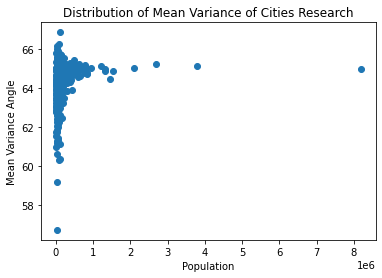

In [107]:
plt.title('Distribution of Mean Variance of Cities Research')
plt.xlabel('Population')
plt.ylabel('Mean Variance Angle')
plt.scatter(research_cities_pops, research_cities_mean_variance)

Score on fitting data: 0.09803057272180726
Coefficient value: [0.00433503]


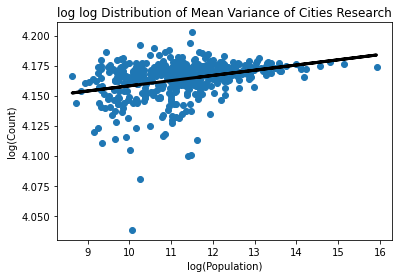

In [113]:
loglogfit(research_cities_pops, research_cities_mean_variance, title='log log Distribution of Mean Variance of Cities Research')

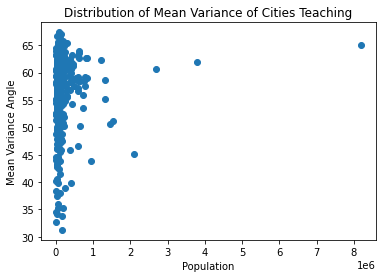

In [108]:
plt.title('Distribution of Mean Variance of Cities Teaching')
plt.xlabel('Population')
plt.ylabel('Mean Variance Angle')
plt.scatter(teaching_cities_pops, teaching_cities_mean_variance)

Score on fitting data: 0.017994278149093268
Coefficient value: [0.01515649]


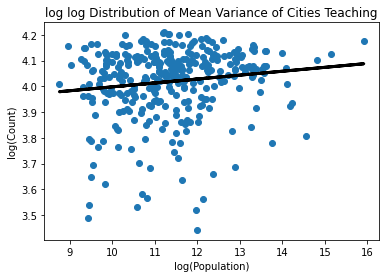

In [114]:
loglogfit(teaching_cities_pops, teaching_cities_mean_variance, title='log log Distribution of Mean Variance of Cities Teaching')

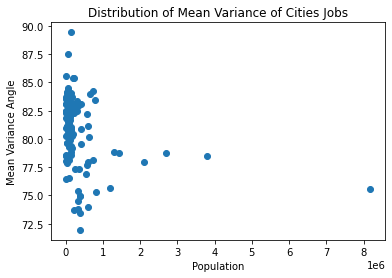

In [109]:
plt.title('Distribution of Mean Variance of Cities Jobs')
plt.xlabel('Population')
plt.ylabel('Mean Variance Angle')
plt.scatter(job_cities_pops, job_cities_mean_variance)

Score on fitting data: 0.13863731315594008
Coefficient value: [-0.01077941]


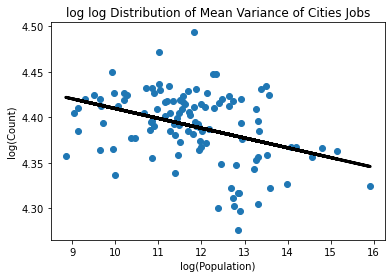

In [115]:
loglogfit(job_cities_pops, job_cities_mean_variance, title='log log Distribution of Mean Variance of Cities Jobs')

###  Tier based Variance analysis



In [49]:
with open("../saved_data_structures/teaching_to_research_matching.txt") as file:
    teaching_to_research = json.load(file)

In [50]:
teaching_to_research_match = {}

In [51]:
for teach_org in teaching_to_research:
    if teaching_to_research[teach_org][1] > 90:
        teaching_to_research_match[teach_org] = teaching_to_research[teach_org][0]

In [52]:
teaching_to_research_match['University of California-Berkeley'] = 'Univ Calif Berkeley'
teaching_to_research_match['University of Washington-Seattle Campus'] = 'Univ Washington'
teaching_to_research_match['Georgia Institute of Technology-Main Campus'] = 'Georgia Tech'
teaching_to_research_match['University of Pittsburgh-Pittsburgh Campus'] = 'Univ Pittsburgh'
teaching_to_research_match['Ohio State University-Main Campus'] = 'Ohio State Univ'
teaching_to_research_match['Texas A & M University-College Station'] = 'Texas A&M Univ'

In [53]:
with open('../saved_data_structures/tiers.txt') as json_file:
    tiers = json.load(json_file)

In [54]:
tiers['1'].append('Harvard University')

In [55]:
with open('../saved_data_structures/tiers_research.txt') as json_file:
    tiers_research = json.load(json_file)

In [56]:
def clean_uni_name(uni_name):
    # matching for peculiarities in the tiers
    # to fix - Uni Houston, Purdue, University of Pittsburgh, 
    # to fix - UMass-Amherst, UMass-Boston, Uni South Florida, Tulane, oklahoma-norman, uni of alaska
    uni_name = uni_name.replace(" - ", "-").replace(" : ", "-").replace(", ", "-").replace(" (MIT)", "").replace(".", "")
    uni_name = uni_name.replace("Columbia University", "Columbia University in the City of New York").replace("The ", "")
    uni_name = uni_name.replace("University of Colorado at Boulder", "University of Colorado Boulder")
    uni_name = uni_name.replace("University of Colorado at Denver", "University of Colorado Denver")
    uni_name = uni_name.replace("University of Texas at Austin", "The University of Texas at Austin")
    uni_name = uni_name.replace("University of Texas at Dallas", "The University of Texas at Dallas")
    uni_name = uni_name.replace("Indiana University Bloomington", "Indiana University-Bloomington")
    uni_name = uni_name.replace("University of Washington", "University of Washington-Seattle Campus")
    uni_name = uni_name.replace("Georgia Institute of Technology", "Georgia Institute of Technology-Main Campus")
    uni_name = uni_name.replace("The Ohio State University - Columbus", "Ohio State University-Main Campus")
    uni_name = uni_name.replace("Texas A&M University", "Texas A & M University-College Station")
    return(uni_name)

In [57]:
within_tier_angles_r = {}
within_tier_angles_t = {}

In [58]:
american_unis = []

In [59]:
for tier in tiers:
    for uni in tiers[tier]:
        uni_name = clean_uni_name(uni)
        if uni_name in teaching_orgs_info:
            american_unis.append(uni_name)

In [60]:
america_tiers = {}

In [61]:
i = 0

In [62]:
for num in range(0, 7):
    america_tiers[num] = american_unis[i:i+21]
    i += 21

In [63]:
# america_tiers[0].remove('University of California-San Francisco')

In [64]:
america_tiers[0].append('Harvard University')

In [65]:
america_tiers[1].remove('Harvard University')

In [66]:
america_tiers[1].append('University of California-San Francisco')

In [67]:
for tier in america_tiers:
    
    within_tier_angles_r[tier] = 0
    within_tier_angles_t[tier] = 0
    tier_checks_r = 0
    tier_checks_t = 0
    for uni in america_tiers[tier]:  
        try:
            within_tier_angles_r[tier] += research_orgs_info[teaching_to_research_match[clean_uni_name(uni)]][0]
            tier_checks_r += 1
        except KeyError:
            pass
        try:
            within_tier_angles_t[tier] += teaching_orgs_info[clean_uni_name(uni)][0]
            tier_checks_t += 1
        except KeyError:
            pass
            
    
    within_tier_angles_r[tier] = round(within_tier_angles_r[tier] / tier_checks_r, 3)
    within_tier_angles_t[tier] = round(within_tier_angles_t[tier] / tier_checks_t, 3)
        
        

In [68]:
within_tier_angles_r

{0: 64.855, 1: 64.811, 2: 64.857, 3: 64.865, 4: 64.666, 5: 64.586, 6: 64.767}

In [69]:
within_tier_angles_t

{0: 64.311, 1: 60.909, 2: 59.942, 3: 59.089, 4: 59.603, 5: 59.712, 6: 59.472}

In [70]:
reader = csv.reader(open("../saved_data_structures/state_unis.csv"))

In [71]:
states = {}

In [72]:
for k,v in reader:
    states[k] = eval(v)

In [73]:
state_variances_r = {}
state_variances_t = {}

In [74]:
for state in states:
    state_variances_r[state] = 0
    state_variances_t[state] = 0
    state_checks_r = 0
    state_checks_t = 0
    
    for uni in states[state]:  
        try:
            state_variances_t[state] += teaching_orgs_info[uni][0]
            state_checks_t += 1
        except KeyError:
            pass
        try:
            state_variances_r[state] += research_orgs_info[teaching_to_research_match[uni]][0]
            state_checks_r += 1
        except KeyError:
            pass
            
    try:
        state_variances_r[state] = round(state_variances_r[state] / state_checks_r, 3)
        state_variances_t[state] = round(state_variances_t[state] / state_checks_t, 3)
    except ZeroDivisionError:
        del state_variances_r[state]
        del state_variances_t[state]
        print(state)
        


NM
NV
ND



In [75]:
state_variances_r

{'TX': 64.0,
 'MS': 63.936,
 'MA': 64.412,
 'CA': 64.53,
 'GA': 64.083,
 'NJ': 64.334,
 'MI': 64.204,
 'FL': 64.139,
 'AL': 64.622,
 'MO': 64.22,
 'NC': 64.43,
 'NY': 64.039,
 'OH': 64.349,
 'IL': 63.201,
 'WA': 64.38,
 'MD': 64.605,
 'SC': 64.05,
 'MT': 64.11,
 'KY': 64.283,
 'IA': 64.457,
 'LA': 62.991,
 'UT': 64.822,
 'CO': 64.5,
 'HI': 64.474,
 'OK': 63.155,
 'WY': 64.729,
 'PA': 64.324,
 'IN': 64.486,
 'AZ': 64.964,
 'VA': 64.515,
 'VT': 64.887,
 'WI': 64.711,
 'ID': 64.32,
 'AR': 64.205,
 'DC': 64.33,
 'TN': 64.613,
 'OR': 64.415,
 'MN': 64.638,
 'NH': 60.852,
 'KS': 63.861,
 'RI': 64.748,
 'ME': 64.415,
 'WV': 64.562,
 'AK': 64.754,
 'SD': 63.927,
 'NE': 64.815,
 'CT': 64.391,
 'DE': 63.204}

In [76]:
state_variances_t

{'TX': 49.641,
 'MS': 50.643,
 'MA': 61.436,
 'CA': 57.286,
 'GA': 54.169,
 'NJ': 55.801,
 'MI': 50.724,
 'FL': 52.683,
 'AL': 51.58,
 'MO': 56.82,
 'NC': 56.973,
 'NY': 59.184,
 'OH': 56.571,
 'IL': 56.041,
 'WA': 57.647,
 'MD': 58.35,
 'SC': 48.367,
 'MT': 59.921,
 'KY': 56.485,
 'IA': 57.998,
 'LA': 57.112,
 'UT': 55.729,
 'CO': 56.146,
 'HI': 55.915,
 'OK': 51.497,
 'WY': 55.08,
 'PA': 56.41,
 'IN': 57.365,
 'AZ': 50.588,
 'VA': 59.569,
 'VT': 65.593,
 'WI': 57.382,
 'ID': 54.236,
 'AR': 55.946,
 'DC': 59.452,
 'TN': 53.39,
 'OR': 56.896,
 'MN': 56.767,
 'NH': 60.525,
 'KS': 50.918,
 'RI': 63.047,
 'ME': 56.434,
 'WV': 57.408,
 'AK': 55.49,
 'SD': 55.903,
 'NE': 61.452,
 'CT': 55.142,
 'DE': 61.456}

In [77]:
reader = csv.reader(open("../saved_data_structures/city_unis.csv"))

In [78]:
cities = {}

In [79]:
for k,v in reader:
    cities[k] = eval(v)

In [80]:
city_variances_r = {}
city_variances_t = {}

In [81]:
for city in cities:
    
        
    if len(cities[city]) < 2:
        continue
    
    city_variances_r[city] = 0
    city_variances_t[city] = 0
    city_checks_r = 0
    city_checks_t = 0

    
    for uni in cities[city]:  
        try:
            city_variances_t[city] += teaching_orgs_info[uni][0]
            city_checks_t += 1
        except KeyError:
            pass
        try:
            city_variances_r[city] += research_orgs_info[teaching_to_research_match[uni]][0]
            city_checks_r += 1
        except KeyError:
            pass
            
    try:
        city_variances_r[city] = round(city_variances_r[city] / city_checks_r, 3)
        city_variances_t[city] = round(city_variances_t[city] / city_checks_t, 3)
    except ZeroDivisionError:
        del city_variances_r[city]
        del city_variances_t[city]
        print(city)
        

Laredo
Orlando
Bellevue
Charlotte
Denton
Austin
Champaign
Fort Lauderdale
Knoxville
Santa Monica
Ann Arbor
Mount Pleasant
Abilene
Victoria
Wilmington
Arlington
Rome
Las Vegas
Evanston
Boulder
Fort Wayne
Blacksburg
El Paso
Eureka
Danville
Columbia
Santa Barbara
Albuquerque
Greensboro
Kansas City
Baton Rouge
Roanoke
Rocklin
Texarkana
Chattanooga
Mansfield
Little Rock
Pasadena
Brooklyn Park
Dover
Reno
Raleigh
Dallas
Greenwood
Lynchburg
Farmington
Monroe
Pueblo
New London
Olympia
San Luis Obispo
Fulton
Hillsboro
Plattsburgh
Mount Vernon
Staten Island
Savannah
Monterey
Phoenix
Cypress
Pensacola
Camarillo
Auburn
Moorhead
York
Fairfield
Whittier
Berea
Asheville
El Cajon
Pleasant Hill
Williamsburg
Manchester
Marietta
Newton Centre
Lincoln
Charlottesville
Bakersfield
Hattiesburg
Purchase
Centralia
Merced
Wilmore
Hammond
Aberdeen
River Forest
Oakland
Waterbury
Georgetown
Dayton
Costa Mesa
Hampton
Green Bay
La Crosse
Maryville
Spartanburg
Brooklyn
Flushing
Fremont
Adrian
Nampa
West Hartford
Apple

In [82]:
city_variances_r['Chicago']

61.946

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
def analyse_cities(cities, rev=True):
    angles = list(cities.values())
    angles = list(filter((0).__ne__, angles))
    ax = sns.distplot(angles)
    ax.set(xlabel="Angles", ylabel="Proportion of Counts", title="Distribution of Angles")
    plt.show()
    sorted_vals = sorted(cities.items(), key=operator.itemgetter(1))
    if rev:
        sorted_vals.reverse()
        return sorted_vals
    else:
        return sorted_vals

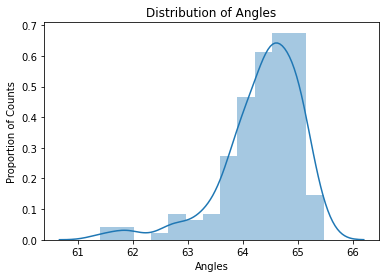

In [85]:
sorted_variances_r = analyse_cities(city_variances_r)